# LGBM & XGBM

## Exploratory Data Analysis (EDA):

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import os

In [2]:
from google.colab import files
uploaded = files.upload()


Saving Titanic_test.csv to Titanic_test (1).csv
Saving Titanic_train.csv to Titanic_train (1).csv


In [3]:
train_data = pd.read_csv('Titanic_train.csv')

In [4]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
test_data = pd.read_csv('Titanic_test.csv')

In [6]:
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [7]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB


In [9]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [10]:
test_data.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


## Remove unwanted Columns

In [11]:
train_data.drop(columns = ['PassengerId', 'Name', 'Ticket', 'Cabin'], inplace = True)

In [12]:
test_data.drop(columns = ['PassengerId', 'Name', 'Ticket', 'Cabin'], inplace = True)

In [13]:
train_data.head(2)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C


In [14]:
test_data.head(2)

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,34.5,0,0,7.8292,Q
1,3,female,47.0,1,0,7.0000,S


## Check for Outliers

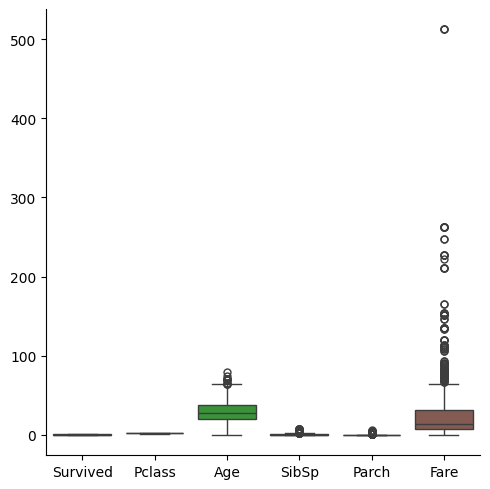

In [15]:
sns.catplot(train_data, kind = 'box')
plt.show()

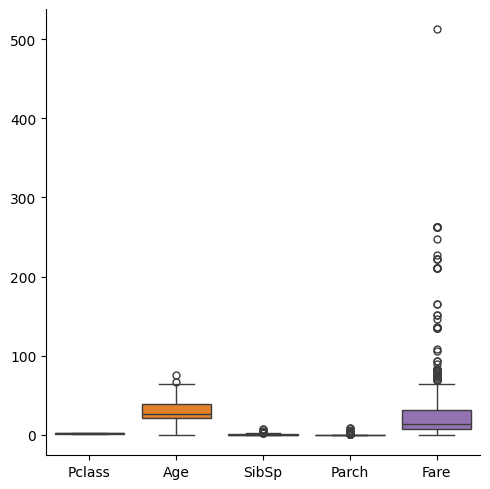

In [16]:
sns.catplot(test_data, kind = 'box')
plt.show()

In [17]:
# Define columns to cap outliers
columns_to_cap = ["Age", "SibSp", "Parch", "Fare", "Pclass", "Survived"]

# Loop through each column and cap outliers
for col in columns_to_cap:
    q1 = train_data[col].quantile(0.25)
    q3 = train_data[col].quantile(0.75)
    IQR = q3 - q1
    upper_limit = q3 + 1.5 * IQR  # Only capping upper limit

    # Apply capping
    train_data[col] = train_data[col].apply(lambda x: upper_limit if x > upper_limit else x)

In [18]:
# Define columns to cap outliers
columns_to_cap = ["Age", "SibSp", "Parch", "Fare", "Pclass"]

# Loop through each column and cap outliers
for col in columns_to_cap:
    q1 = test_data[col].quantile(0.25)
    q3 = test_data[col].quantile(0.75)
    IQR = q3 - q1
    upper_limit = q3 + 1.5 * IQR  # Only capping upper limit

    # Apply capping
    test_data[col] = test_data[col].apply(lambda x: upper_limit if x > upper_limit else x)

## Correlation

In [19]:
num = ["Age", "SibSp","Pclass", "Survived", "Fare", "Parch"]
train_data[num].corr()

,Age,SibSp,Pclass,Survived,Fare,Parch
Age,1.000000,-0.276458,-0.371017,-0.076963,0.153512,NaN
SibSp,-0.276458,1.000000,0.023180,0.031434,0.349615,NaN
Pclass,-0.371017,0.023180,1.000000,-0.338481,-0.715300,NaN
Survived,-0.076963,0.031434,-0.338481,1.000000,0.317430,NaN
Fare,0.153512,0.349615,-0.715300,0.317430,1.000000,NaN
Parch,NaN,NaN,NaN,NaN,NaN,NaN


In [20]:
num = ["Age", "SibSp","Pclass", "Fare", "Parch"]
test_data[num].corr()

,Age,SibSp,Pclass,Fare,Parch
Age,1.000000,-0.048755,-0.492265,0.364951,NaN
SibSp,-0.048755,1.000000,-0.064610,0.331359,NaN
Pclass,-0.492265,-0.064610,1.000000,-0.748550,NaN
Fare,0.364951,0.331359,-0.748550,1.000000,NaN
Parch,NaN,NaN,NaN,NaN,NaN


## Data Preprocessing:

### Handle missing values

In [21]:
train_data["Age"].fillna(train_data["Age"].median(), inplace=True)

In [22]:
test_data["Age"].fillna(test_data["Age"].median(), inplace=True)

In [23]:
test_data["Fare"].fillna(test_data["Fare"].median(), inplace=True)

In [24]:
train_data["Embarked"].fillna(train_data["Embarked"].mode()[0], inplace=True)

In [25]:
test_data["Embarked"].fillna(test_data["Embarked"].mode()[0], inplace=True)


### Encode categorical variables.

In [26]:
train_data.head(2)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1.0,0.0,7.2500,S
1,1,1,female,38.0,1.0,0.0,65.6344,C


In [27]:
from sklearn.preprocessing import LabelEncoder

In [28]:
encode = LabelEncoder()

In [29]:
# List of categorical columns to encode
categorical_cols = ['Sex', 'Embarked']

for col in categorical_cols:
    train_data[col] = encode.fit_transform(train_data[col])

In [30]:
train_data.head(2)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1.0,0.0,7.2500,2
1,1,1,0,38.0,1.0,0.0,65.6344,0


In [31]:
categorical_cols = ['Sex', 'Embarked']

for col in categorical_cols:
    test_data[col] = encode.fit_transform(test_data[col])

In [32]:
test_data.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,34.5,0.0,0.0,7.8292,1
1,3,0,47.0,1.0,0.0,7.0000,2
2,2,1,62.0,0.0,0.0,9.6875,1
3,3,1,27.0,0.0,0.0,8.6625,2
4,3,0,22.0,1.0,0.0,12.2875,2


## Select Features and Target Variable

In [33]:
features = ["Pclass", "Sex", "Age", "SibSp", "Parch", "Fare", "Embarked"]

X_train = train_data[features]
y_train = train_data["Survived"]  # Target variable

X_test = test_data[features]

### Standardize the Data

In [34]:
from sklearn.preprocessing import StandardScaler

In [35]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [36]:
X_train = pd.DataFrame(X_train)
X_test = pd.DataFrame(X_test)

In [37]:
X_train.head(2)

,0,1,2,3,4,5,6
0,0.827377,0.737695,-0.569300,0.81022,0.0,-0.820552,0.585954
1,-1.566107,-1.355574,0.678422,0.81022,0.0,2.031623,-1.942303


In [38]:
X_test.head(2)

,0,1,2,3,4,5,6
0,0.827377,0.737695,0.405483,-0.602512,0.0,-0.792258,-0.678175
1,0.827377,-1.355574,1.380266,0.810220,0.0,-0.832765,0.585954


## Building Predictive Models:

### Split the preprocessed dataset into training and testing sets.

In [39]:
from sklearn.model_selection import train_test_split

In [40]:
X_train, X_val, y_train, y_val = train_test_split(X_train,
                                                  y_train,
                                                  test_size=0.2,
                                                  random_state=42)
X_train.shape, X_val.shape, y_train.shape, y_val.shape

((712, 7), (179, 7), (712,), (179,))

## XGBoost

In [41]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV

In [42]:
xgb = xgb.XGBClassifier()

In [43]:
parameters = {'n_estimators': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100],
                'max_depth': [2, 4, 6, 8, 10],
                'learning_rate': [0.01, 0.05, 0.1, 0.2, 0.3],
                'subsample': [0.5, 0.6, 0.7, 0.8, 0.9]
                }

# Set up grid search
grid_search = GridSearchCV(estimator=xgb, param_grid=parameters,
                           scoring='accuracy',
                           cv=5,
                           n_jobs=-1)

In [44]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.05, 0.1, 0.2, 0.3],
                         'max_depth': [2, 4, 6, 8, 10],
                         'n_estimators': [10, 20, 30, 40, 50, 60, 70, 80, 90,
                                          100],
                         'subsample': [0.5, 0.6, 0.7, 0.8, 0.9]},
             scoring='accuracy')

In [45]:
print("Best Parameters:", grid_search.best_params_)


Best Parameters: {'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 90, 'subsample': 0.9}


In [46]:
best_model_xgb = grid_search.best_estimator_

In [47]:
yhat_test_xgb = best_model_xgb.predict(X_test)

In [48]:
yhat_test_xgb

array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,

## LightGBM

In [49]:
import lightgbm as lgb

In [50]:
params = {
    'num_leaves': [8,12,24,32],
    'learning_rate': [0.05,0.01,0.02,0.001],
    'feature_fraction': [0.9,0.8,0.7,0.6,0.5],
    'bagging_fraction': [0.9,0.8,0.7,0.6,0.5],
}

In [51]:
lgb = lgb.LGBMClassifier(boosting_type='gbdt', objective='binary', metric='binary_logloss')

In [52]:
lggrid_search = GridSearchCV(estimator=lgb, param_grid=params, scoring='accuracy', cv=5, n_jobs=-1)

In [53]:
lggrid_search.fit(X_train,y_train)

[LightGBM] [Warning] feature_fraction is set=0.7, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7
[LightGBM] [Warning] bagging_fraction is set=0.9, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9
[LightGBM] [Warning] feature_fraction is set=0.7, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7
[LightGBM] [Warning] bagging_fraction is set=0.9, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9
[LightGBM] [Info] Number of positive: 268, number of negative: 444
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000108 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 166
[LightGBM] [Info] Number of data points in the train set: 712, number of used features: 6
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.376404 -> initscore=-0.504838
[LightGBM] [Info] Start training from score -0.504838


GridSearchCV(cv=5,
             estimator=LGBMClassifier(metric='binary_logloss',
                                      objective='binary'),
             n_jobs=-1,
             param_grid={'bagging_fraction': [0.9, 0.8, 0.7, 0.6, 0.5],
                         'feature_fraction': [0.9, 0.8, 0.7, 0.6, 0.5],
                         'learning_rate': [0.05, 0.01, 0.02, 0.001],
                         'num_leaves': [8, 12, 24, 32]},
             scoring='accuracy')

In [54]:
print("Best Parameters:", lggrid_search.best_params_)

Best Parameters: {'bagging_fraction': 0.9, 'feature_fraction': 0.7, 'learning_rate': 0.05, 'num_leaves': 12}


In [55]:
best_model_lgb = lggrid_search.best_estimator_

In [65]:
yhat_test_lgb = best_model_lgb.predict(X_test)

[LightGBM] [Warning] feature_fraction is set=0.7, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7
[LightGBM] [Warning] bagging_fraction is set=0.9, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9


In [66]:
yhat_test_lgb

array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

## Comparative Analysis:

## XGBoost

In [57]:
from sklearn.metrics import confusion_matrix, classification_report

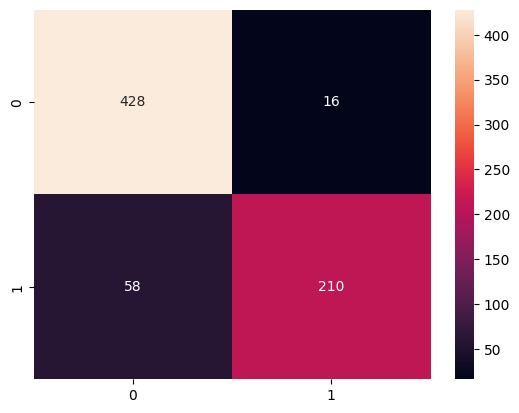

              precision    recall  f1-score   support

           0       0.88      0.96      0.92       444
           1       0.93      0.78      0.85       268

    accuracy                           0.90       712
   macro avg       0.90      0.87      0.89       712
weighted avg       0.90      0.90      0.89       712



In [58]:
yhat_train_xgb = best_model_xgb.predict(X_train)
cm = confusion_matrix(y_train,yhat_train_xgb)
sns.heatmap(cm, annot=True,fmt='d')
plt.show()
print(classification_report(y_train,yhat_train_xgb))

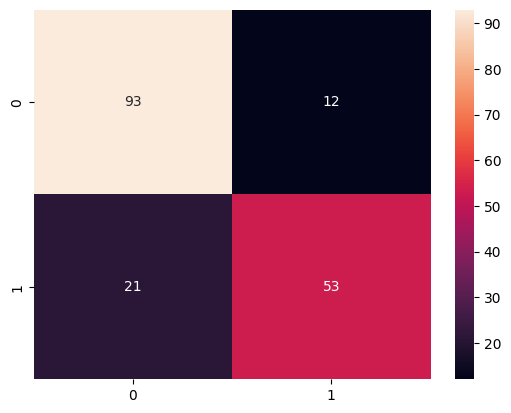

              precision    recall  f1-score   support

           0       0.82      0.89      0.85       105
           1       0.82      0.72      0.76        74

    accuracy                           0.82       179
   macro avg       0.82      0.80      0.81       179
weighted avg       0.82      0.82      0.81       179



In [59]:
yhat_test_xgb = best_model_xgb.predict(X_val)
cm = confusion_matrix(y_val,yhat_test_xgb)
sns.heatmap(cm, annot=True,fmt='d')
plt.show()
print(classification_report(y_val,yhat_test_xgb))

## LightGBM

[LightGBM] [Warning] feature_fraction is set=0.7, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7
[LightGBM] [Warning] bagging_fraction is set=0.9, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9


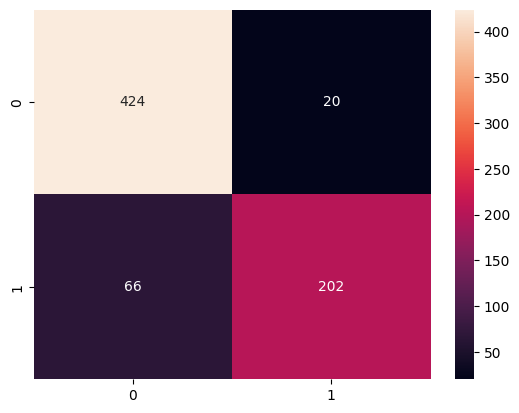

              precision    recall  f1-score   support

           0       0.87      0.95      0.91       444
           1       0.91      0.75      0.82       268

    accuracy                           0.88       712
   macro avg       0.89      0.85      0.87       712
weighted avg       0.88      0.88      0.88       712



In [60]:
yhat_train_lgb = best_model_lgb.predict(X_train)
cm = confusion_matrix(y_train,yhat_train_lgb)
sns.heatmap(cm, annot=True,fmt='d')
plt.show()
print(classification_report(y_train,yhat_train_lgb))

[LightGBM] [Warning] feature_fraction is set=0.7, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7
[LightGBM] [Warning] bagging_fraction is set=0.9, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9


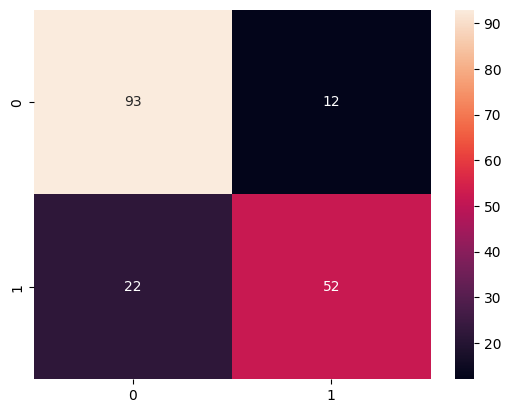

              precision    recall  f1-score   support

           0       0.81      0.89      0.85       105
           1       0.81      0.70      0.75        74

    accuracy                           0.81       179
   macro avg       0.81      0.79      0.80       179
weighted avg       0.81      0.81      0.81       179



In [61]:
yhat_test_lgb = best_model_lgb.predict(X_val)
cm = confusion_matrix(y_val,yhat_test_lgb)
sns.heatmap(cm, annot=True,fmt='d')
plt.show()
print(classification_report(y_val,yhat_test_lgb))

## Visualize and interpret the results

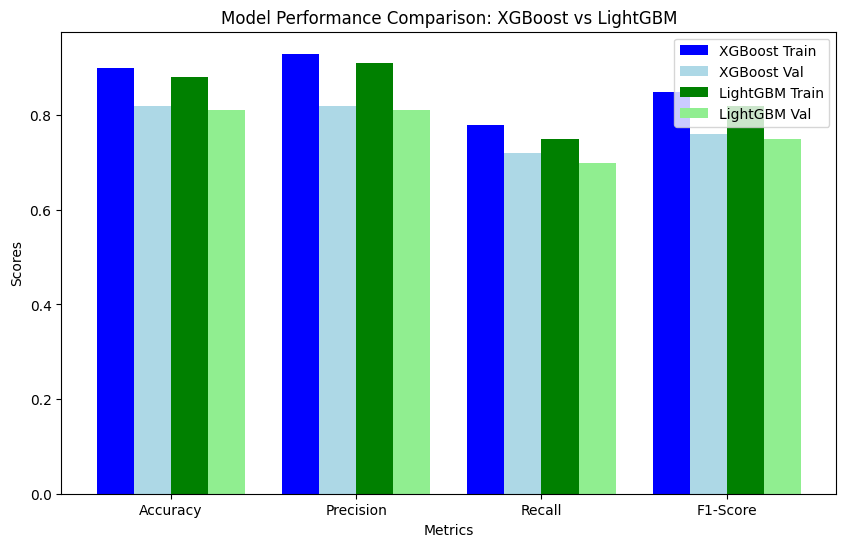

In [67]:
import matplotlib.pyplot as plt
import numpy as np

# Data
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
xgb_train = [0.90, 0.93, 0.78, 0.85]
xgb_val = [0.82, 0.82, 0.72, 0.76]
lgb_train = [0.88, 0.91, 0.75, 0.82]
lgb_val = [0.81, 0.81, 0.70, 0.75]

x = np.arange(len(metrics))
width = 0.2

# Plot
fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(x - width, xgb_train, width, label='XGBoost Train', color='blue')
ax.bar(x, xgb_val, width, label='XGBoost Val', color='lightblue')
ax.bar(x + width, lgb_train, width, label='LightGBM Train', color='green')
ax.bar(x + 2*width, lgb_val, width, label='LightGBM Val', color='lightgreen')

# Labels and Legends
ax.set_xlabel('Metrics')
ax.set_ylabel('Scores')
ax.set_title('Model Performance Comparison: XGBoost vs LightGBM')
ax.set_xticks(x + width / 2)
ax.set_xticklabels(metrics)
ax.legend()

plt.show()


### Training Set Performance:
#### XGBoost performed slightly better than LightGBM on the training set (90% vs. 88% accuracy).
#### Both models had a higher precision than recall, meaning they are better at predicting non-survivors (Class 0) correctly than survivors (Class 1).

### Validation Set Performance:
#### XGBoost also slightly outperformed LightGBM on the validation set (82% vs. 81% accuracy).
#### Both models had a lower recall for Class 1, indicating they missed some true survivors.

### Overfitting Analysis:
#### XGBoost has a bigger performance gap (90% → 82%) between training and validation than LightGBM (88% → 81%), suggesting XGBoost might overfit more.
#### Both models show similar precision and recall trends.